## Scipy: 
 
*    We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. 
 
Task: 
 
1. fitting it to the periodic function 
 
2. plot the fit 
 
*    Data 
 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 

## Fitting it to a periodic function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)

In [3]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

#### Plotting the fit

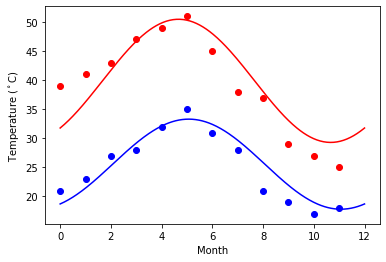

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#### Matplotlib: 
 
*   This assignment is for visualization using matplotlib: 
 
data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 
 
Charts to plot: 
 
1. Create a pie chart presenting the male/female proportion 
 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [6]:
#Load data
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head()                 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [8]:
#Copy the original Data for impute
df_impute = df.copy()

#Get the number columns to impute mean strategy
num_lable = list(df.select_dtypes('number').columns)

# create the imputer, the strategy can be mean and median.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# fit the imputer to the data
imputer.fit(df_impute[num_lable])
df_impute[num_lable] = imputer.transform(df_impute[num_lable])

#Get the number columns to impute mean strategy
cat_lable = list(df.select_dtypes('object').columns)

# create the imputer, with most frequent as strategy to fill missing value.
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Imputer to the categorical data
imputer.fit(df_impute[cat_lable])
df_impute[cat_lable] = imputer.transform(df_impute[cat_lable])

* Create a pie chart presenting the male/female proportion 

Text(0.5, 1.0, 'Male/Female proportion')

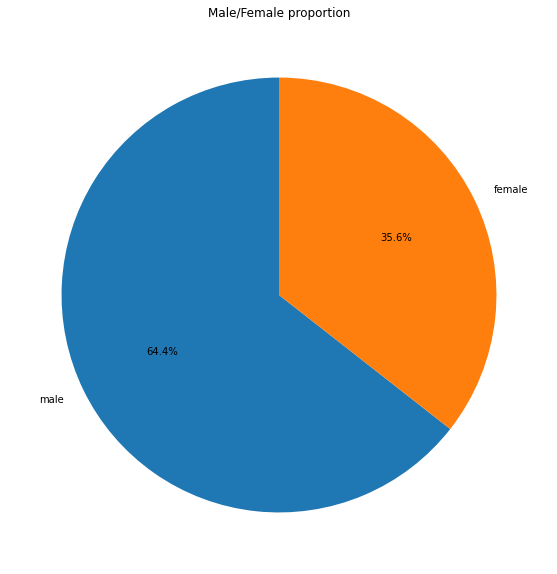

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sex_counts = df_impute['sex'].value_counts()
ax.pie(sex_counts.values.tolist(),labels=sex_counts.index.tolist(), startangle=90,autopct='%.1f%%')
ax.set_title('Male/Female proportion')

In [10]:
df_impute['sex'].value_counts()

male      844
female    466
Name: sex, dtype: int64

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Fare paid and the Age')

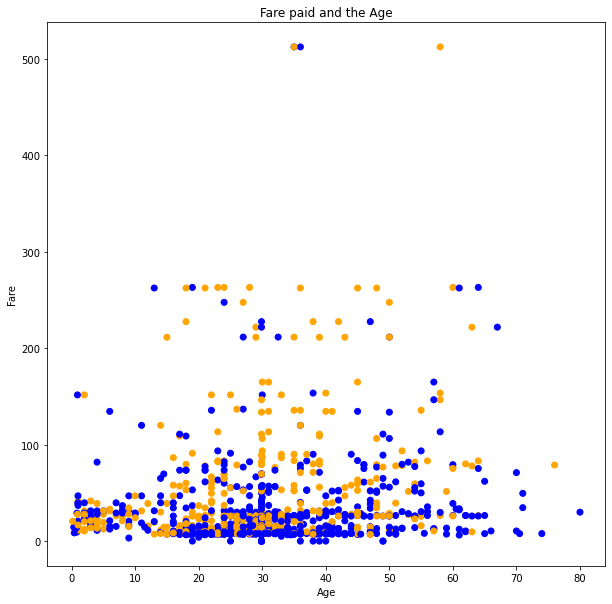

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
colors = {'male':'blue', 'female':'orange'}

ax.scatter(df_impute['age'],df_impute['fare'],c=df_impute['sex'].apply(lambda x:colors[x]))
ax.set_ylabel('Fare')
ax.set_xlabel('Age')

ax.set_title('Fare paid and the Age')